In [52]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import olympus
from olympus import __home__
from olympus.datasets import Dataset
from olympus.emulators import Emulator
from olympus.objects import ParameterVector
from olympus.models import BayesNeuralNet

In [61]:
dataset = Dataset(kind='perovskites')

params = {
    'batch_size':50, 
    'hidden_act':'leaky_relu',
    'hidden_depth':4,
    'hidden_nodes':48,
    'learning_rate':1e-4,
    'reg': 0.01,
}

model = BayesNeuralNet(task='regression', **params, out_act='relu')

emulator = Emulator(
        dataset=dataset,
        model=model,
        feature_transform='identity',
        target_transform='mean',
    )

In [62]:
emulator.train()

[INFO] >>> Training model on 80% of the dataset, testing on 20%...


/home/riley/Software/anaconda3/envs/olympus/lib/python3.7/site-packages/tensorflow_probability/python/layers/util.py:102: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  trainable=trainable)
/home/riley/Software/anaconda3/envs/olympus/lib/python3.7/site-packages/tensorflow_probability/python/layers/util.py:112: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  trainable=trainable)


[INFO]     =======================================================================
[INFO]           Epoch       Train R2     Train RMSD        Test R2      Test RMSD
[INFO]     =======================================================================
[INFO]               0         -8.193          1.035         -8.178          1.108 *
[INFO]             100         -5.306          0.857         -5.464          0.930 *
[INFO]             200         -0.990          0.481         -1.141          0.535 *
[INFO]             300          0.210          0.303          0.181          0.331 *
[INFO]             400          0.536          0.232          0.459          0.269 *
[INFO]             500          0.697          0.188          0.687          0.205 *
[INFO]             600          0.821          0.144          0.834          0.149 *
[INFO]             700          0.886          0.115          0.852          0.141 *
[INFO]             800          0.900          0.108          0.931    

[INFO]            8500          0.981          0.047          0.957          0.075
[INFO]            8600          0.979          0.050          0.971          0.062
[INFO]            8700          0.980          0.049          0.956          0.077
[INFO]            8800          0.982          0.045          0.956          0.077
[INFO]            8900          0.978          0.050          0.971          0.062
[INFO]            9000          0.982          0.046          0.943          0.088
[INFO]            9100          0.981          0.047          0.966          0.067
[INFO]            9200          0.980          0.048          0.969          0.064
[INFO]            9300          0.985          0.042          0.973          0.060 *
[INFO]            9400          0.984          0.043          0.964          0.069
[INFO]            9500          0.983          0.044          0.956          0.077
[INFO]            9600          0.983          0.045          0.972          0.061
[I

[INFO]           17400          0.994          0.026          0.963          0.070
[INFO]           17500          0.994          0.026          0.961          0.072
[INFO]           17600          0.993          0.029          0.969          0.064
[INFO]           17700          0.995          0.025          0.961          0.072
[INFO]           17800          0.995          0.025          0.967          0.066
[INFO]           17900          0.994          0.027          0.968          0.066
[INFO]           18000          0.994          0.025          0.971          0.062
[INFO]           18100          0.994          0.026          0.977          0.056
[INFO]           18200          0.994          0.026          0.960          0.073
[INFO]           18300          0.993          0.029          0.963          0.070
[INFO]           18400          0.994          0.026          0.960          0.073
[INFO]           18500          0.994          0.026          0.967          0.067
[INF

{'train_r2': 0.9975356460717245,
 'test_r2': 0.9641150008094033,
 'train_rmsd': 0.055309247127733316,
 'test_rmsd': 0.22719023966366497}

In [56]:
test_feats = dataset.test_set_features.values
test_targs = dataset.test_set_targets.values
train_feats = dataset.train_set_features.values
train_targs = dataset.train_set_targets.values
print(test_feats.shape)
type(test_feats)

(38, 3)


numpy.ndarray

In [57]:
mu_test, sigma_ep_test, sigma_al_test = emulator.run(test_feats, num_samples=100)
mu_train, sigma_ep_train, sigma_al_train = emulator.run(train_feats, num_samples=100)

In [58]:
mu.shape, sigma_ep_test.shape

((38, 1), (38, 1))

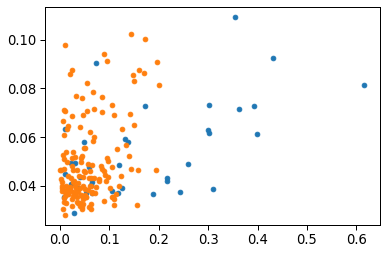

In [59]:
plt.scatter(np.abs(mu_test-test_targs), sigma_ep_test,  label='test set')
plt.scatter(np.abs(mu_train-train_targs), sigma_ep_train,  label='train set')

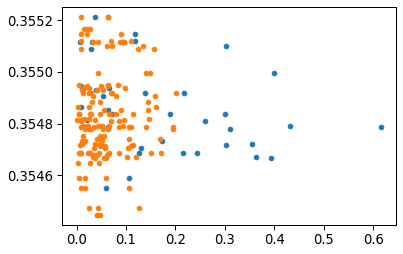

In [60]:
plt.scatter(np.abs(mu_test-test_targs), sigma_al_test,  label='test set')
plt.scatter(np.abs(mu_train-train_targs), sigma_al_train,  label='train set')

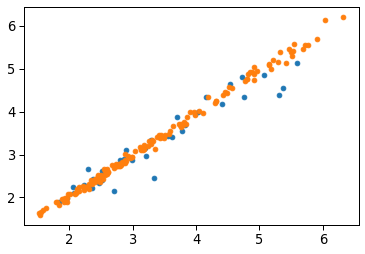

In [24]:
plt.scatter(test_targs, mu_test)
plt.scatter(train_targs, mu_train)
